In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the Autism Screening for Toddlers dataset
df = pd.read_csv('superstores.csv')#ith actual file path

# Simulate a time series by adding a timestamp (since the dataset lacks explicit time data)
date_rng = pd.date_range(start='2018-01-01', periods=len(df), freq='D')  # Daily frequency for demo
df['timestamp'] = date_rng
df.set_index('timestamp', inplace=True)

# Calculate Total_Score as the sum of A1 to A10 scores
df['Total_Score'] = df[['A1', 'A2', 'A3', 'A4', 'A5', 
                        'A6', 'A7', 'A8', 'A9', 'A10']].sum(axis=1)

# Clean data (handle any potential missing values)
df['Total_Score'] = df['Total_Score'].fillna(method='ffill').fillna(method='bfill').fillna(0)

C:\Users\Dhiya\AppData\Local\Temp\ipykernel_1232\2385745217.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Total_Score'] = df['Total_Score'].fillna(method='ffill').fillna(method='bfill').fillna(0)


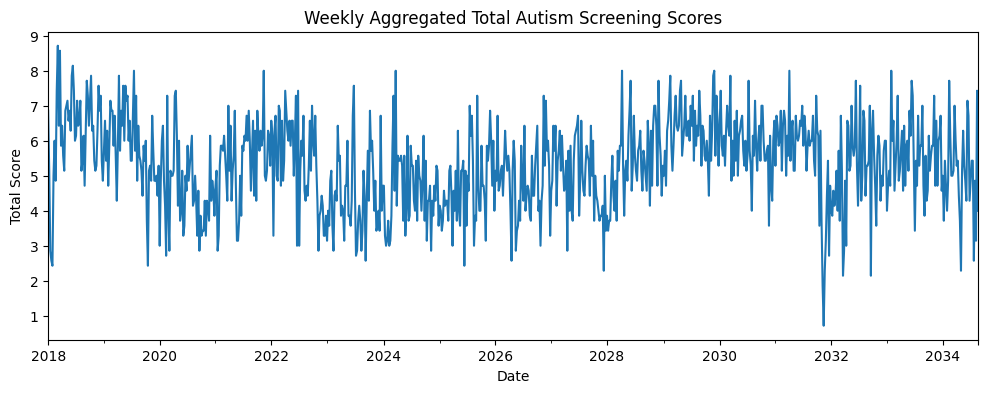

In [8]:
# Aggregate daily data to weekly data using mean
weekly_data = df['Total_Score'].resample('W').mean()
# Plot aggregated weekly data
plt.figure(figsize=(12, 4))
weekly_data.plot(title='Weekly Aggregated Total Autism Screening Scores')
plt.xlabel('Date')
plt.ylabel('Total Score')
plt.show()

<Figure size 1200x400 with 0 Axes>

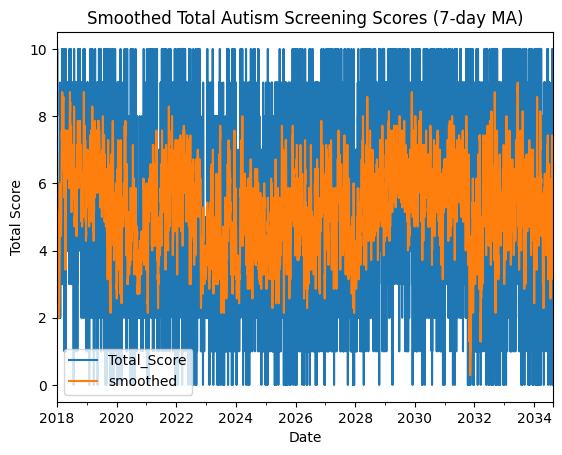

In [9]:
# Apply 7-day moving average for smoothing on the original daily data
df['smoothed'] = df['Total_Score'].rolling(window=7, center=True).mean()
# Plot original and smoothed data
plt.figure(figsize=(12, 4))
df[['Total_Score', 'smoothed']].plot(title='Smoothed Total Autism Screening Scores (7-day MA)')
plt.xlabel('Date')
plt.ylabel('Total Score')
plt.show()

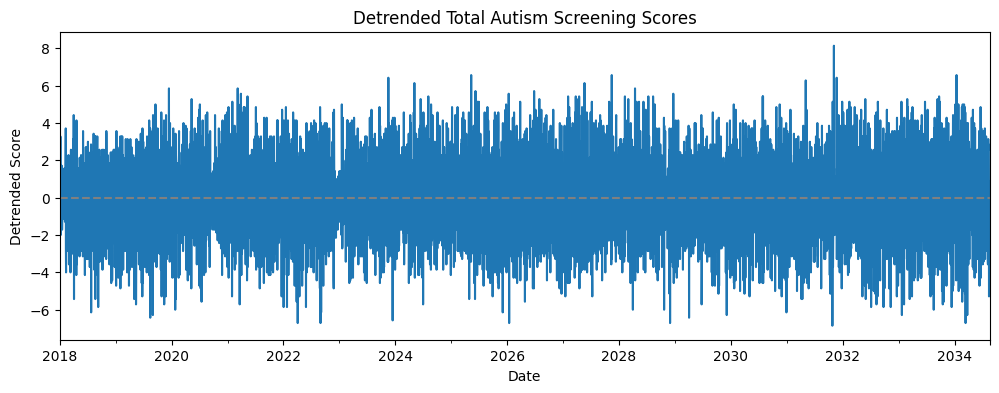

In [10]:
# Detrend by subtracting the smoothed series from the original
df['detrended'] = df['Total_Score'] - df['smoothed']
# Plot detrended data
plt.figure(figsize=(12, 4))
df['detrended'].plot(title='Detrended Total Autism Screening Scores')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Detrended Score')
plt.show()